In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor

In [2]:
df_path = '../data/processed/cleaned_music_population.csv'
df = pd.read_csv(df_path)

In [3]:
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [4]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27.0,0.00468,0.652,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,31.0,0.01270,0.622,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
2,28.0,0.00306,0.620,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,34.0,0.02540,0.774,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,32.0,0.00465,0.638,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323


In [5]:
df_numeric.shape

(45020, 10)

In [6]:
X = df_numeric.drop(columns=['popularity'])
y = df_numeric['popularity']

selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(X, y)

scores = selector.scores_
variables = X.columns

results = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
results

,Variable,Score
3,instrumentalness,6975.274467
1,danceability,6595.214223
5,loudness,5119.872662
0,acousticness,4204.959925
6,speechiness,2364.859263
2,energy,2230.596543
8,valence,739.076885
4,liveness,79.010463
7,tempo,48.610432


In [7]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

imortances = tree_model.feature_importances_

result_importance = pd.DataFrame({'Variable': variables, 'Importance': imortances}).sort_values(by='Importance', ascending=False)
result_importance

,Variable,Importance
3,instrumentalness,0.204051
5,loudness,0.142720
1,danceability,0.127399
6,speechiness,0.098263
0,acousticness,0.091419
2,energy,0.087612
4,liveness,0.085824
8,valence,0.084157
7,tempo,0.078554


## Reconozcoamos las variables mas importantes para dos modelos distintos

C:\Users\jaayg\AppData\Local\Temp\ipykernel_14264\3114452259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variable', data=results, ax=ax[0], palette='Blues_r')
C:\Users\jaayg\AppData\Local\Temp\ipykernel_14264\3114452259.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=result_importance, ax=ax[1], palette='Greens_r')


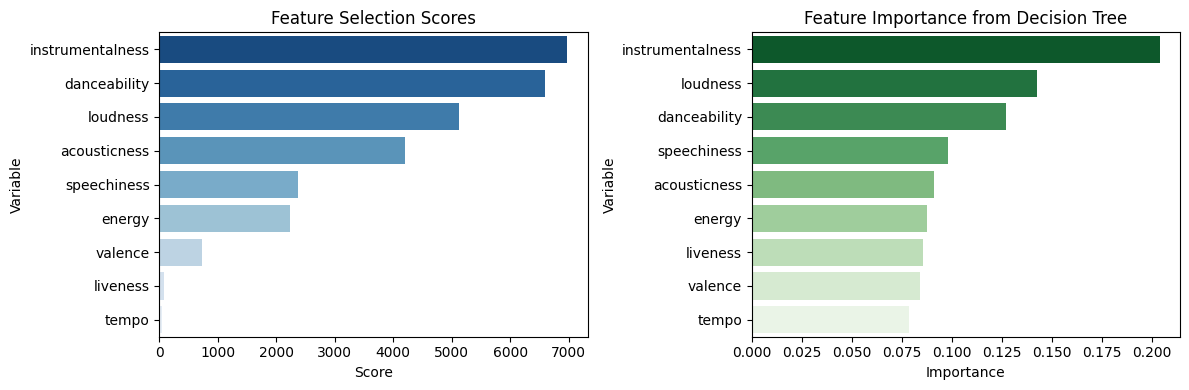

In [8]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))

sns.barplot(x='Score', y='Variable', data=results, ax=ax[0], palette='Blues_r')
ax[0].set_title('Feature Selection Scores')

sns.barplot(x='Importance', y='Variable', data=result_importance, ax=ax[1], palette='Greens_r')
ax[1].set_title('Feature Importance from Decision Tree')

plt.tight_layout()
plt.show()